## [Title goes here]
### IITGN CS612 Fall 2017 - Project Checkpoint Presentation (13 November 2017)
### Sohhom Bandyopadhyay (15510011) and Sujata Sinha (15350008)

**Based on trace files from: ** <br>
http://iotta.snia.org/tracetypes/3 (Nexus 5 Smartphone Traces) <br>
Zhou, D., Pan, W., Wang, W., & Xie, T. (2015, October). I/O characteristics of smartphone applications and their implications for eMMC design. In Workload Characterization (IISWC), 2015 IEEE International Symposium on (pp. 12-21). IEEE.



** Outline (this notebook):**
 - Description of trace file format
 - Extraction of timestamps from log files
 - Calculating correlation between request size and duration (e.g. turnaround time and hardware processing time)
 - plots of:
    - plot1
    - plot2
 - some more thing
 

** ToDo (next two weeks): ** <br>
 -  Machine learning classifier to predict the block access

## Trace file format:
**column 0** : start address (in sectors) <br>
**column 1** : access size (in sectors) <br>
**column 2** : access size (in byte) <br>
**column 3** : access type & waiting status (3 bit number):
 - LSB: indicates read (0) or write (1)
 - MSB: indicates waiting status (0 = yes, 1 = no)
 - Middle bit: unused <br>
 (It's not represented as binary, but as integers : 0, 1, 4 and 5 )
 <br>
 
**column 4** : request generate time (the request been generated and inserted into request queue). <br>
**column 5** : request process start time (the request been fetched and dequeue by mmc driver from request queue and begin to process)  <br>
**column 6** : request submit time (submitted to hardware) <br>
**column 7** : request finish time (time of the callback function been invoked after request completion)  <br>

Thus, any request goes through 4 stages: push to queue -> start processing -> submit to hardware -> finish (callback)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
data_dir = 'Trace_files'
fnames = [x for x in filter(lambda x: x.endswith('.txt'), os.listdir(os.path.join('.', data_dir)))]

In [3]:
fname = fnames[0]
df = pd.read_csv(os.path.join(data_dir, fname), delimiter='\s+', header = None, dtype = float)

In [4]:
request_size = df.iloc[:,2]

# preprocessing and creating new columns 
 - Convert unix timestamps to datetime objects (so that they are readable and can perform arithmetic on them)
 - calculate durations of various processing stages

In [5]:
for cindx in 4, 5, 6, 7:
    df.loc[:,cindx] = df.loc[:,cindx].apply(datetime.fromtimestamp)

In [6]:
turnaround_time = df.iloc[:,7] - df.iloc[:,4]
turnaround_time = turnaround_time.apply(lambda x: x.components.milliseconds*1000+x.components.microseconds)
hw_processing_time = df.iloc[:,7] - df.iloc[:,6]
hw_processing_time = hw_processing_time.apply(lambda x: x.components.milliseconds*1000+x.components.microseconds)

In [8]:
df.iloc[:,3].unique()

array([ 5.,  1.,  4.,  0.])

### check for various correlations

In [10]:
turnaround_time.corr(request_size)

0.43529940771902798

In [11]:
hw_processing_time.corr(request_size)

0.68328999175448069

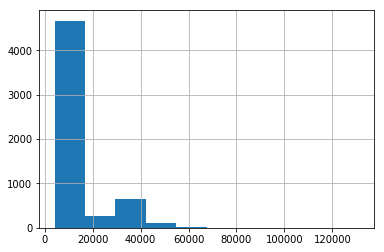

In [12]:
request_size.hist()
plt.show()

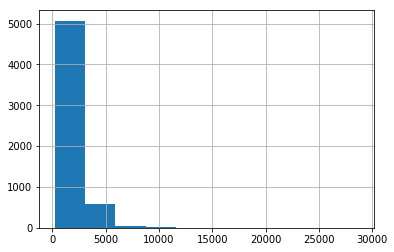

In [13]:
hw_processing_time.hist()
plt.show()

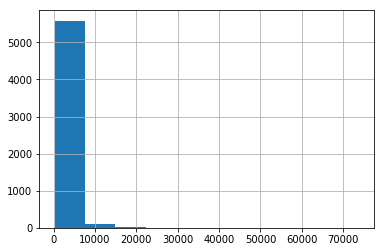

In [14]:
turnaround_time.hist()
plt.show()